# Load the data from the csv‐files

In [1]:
import pandas as pd

train = pd.read_csv('C:/Users/Admin/Downloads/train.csv')
test = pd.read_csv('C:/Users/Admin/Downloads/test.csv')

In [2]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


#  First we will try to fix the missing values so thatalgorithm works properly.

## From the above train_info(), we can check that we have two two passengers without Embarked so that is bearable

## then cabin has few information we can drop that

## then imput the missing values in the "Age" column of the "train" dataframe with the mean of the non-missing values in that column

In [3]:
# We only have two passengers without it. This is bearable
train = train.dropna(subset=["Embarked"])


# We only have very few information about the cabin, let's drop it
train = train.drop("Cabin", axis=1)

# The age misses quite a few times. But intuition says it might be important for someone's chance to survive.
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Let's remove the Identifiers(PassengerID,Name,Ticket).
## Identifiers are usually removed from the dataset because they are not useful for building a predictive model. They are unique, and therefore not informative about the outcome variable.

In [4]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# Now need to translate textual data into numbers.
## First, we import the LabelEncoder and initialize
## Then, we loop through the columns with textual data (Sex and Embarked)
## For each column,we need to fit the encoder to the data in the column before we can transform the values. 

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [6]:
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'.format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [8]:
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))



We have 711 training and 178 testing rows
There are 7 input columns


In [9]:
import numpy as np
X = np.array(train)

print(X)

[[0.         1.         1.         ... 0.         0.01415106 1.        ]
 [1.         0.         0.         ... 0.         0.13913574 0.        ]
 [1.         1.         0.         ... 0.         0.01546857 1.        ]
 ...
 [0.         1.         0.         ... 0.33333333 0.04577135 1.        ]
 [1.         0.         1.         ... 0.         0.0585561  0.        ]
 [0.         1.         1.         ... 0.         0.01512699 0.5       ]]


In [10]:
import matplotlib.pyplot as plt


# Reducing the Number of Features
## applied a PCA transformation.Transformed our seven features into two features only. This is dimensionality reduction 

In [11]:
from sklearn.decomposition import PCA

input_data = PCA(n_components=2).fit_transform(input_data)



In [12]:
input_data.shape

(889, 2)

In [13]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.svm import SVC

In [14]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_input, train_labels) 

In [15]:
train_input, test_input, train_labels, test_labels = train_test_split(
    input_data, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_input, train_labels)

train_score_c2 = svc.score(train_input, train_labels)
test_score_c2 = svc.score(test_input, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.81
Classical SVC on the test dataset:     0.83


# feature  = 2 , encoding = ZZFeatureMap , Ansatz = RealAmplitude

In [16]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

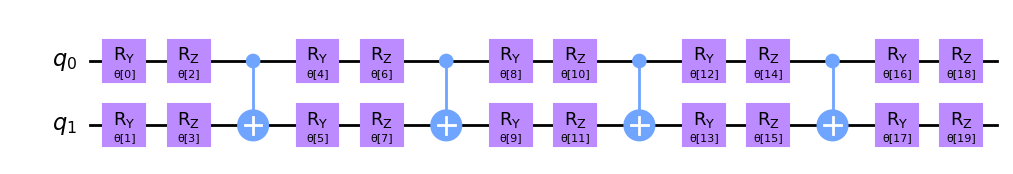

In [17]:
from  qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import EfficientSU2, RealAmplitudes
seed = 10598
feature_dim = 2
num_qubits = 2 


ZZ_feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=4)


#Ansatz
variational_circ = EfficientSU2(num_qubits, reps=4)
variational_circ.decompose().draw("mpl")

In [22]:
cobyla = COBYLA(maxiter=500, tol=0.001)

In [23]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [24]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [25]:
# initilizing backend
from qiskit import*
seed = 10598
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=2, feature_map=ZZ_feature_map, ansatz=variational_circ, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19032\2902331436.py:13: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(num_qubits=2, feature_map=ZZ_feature_map, ansatz=variational_circ, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)


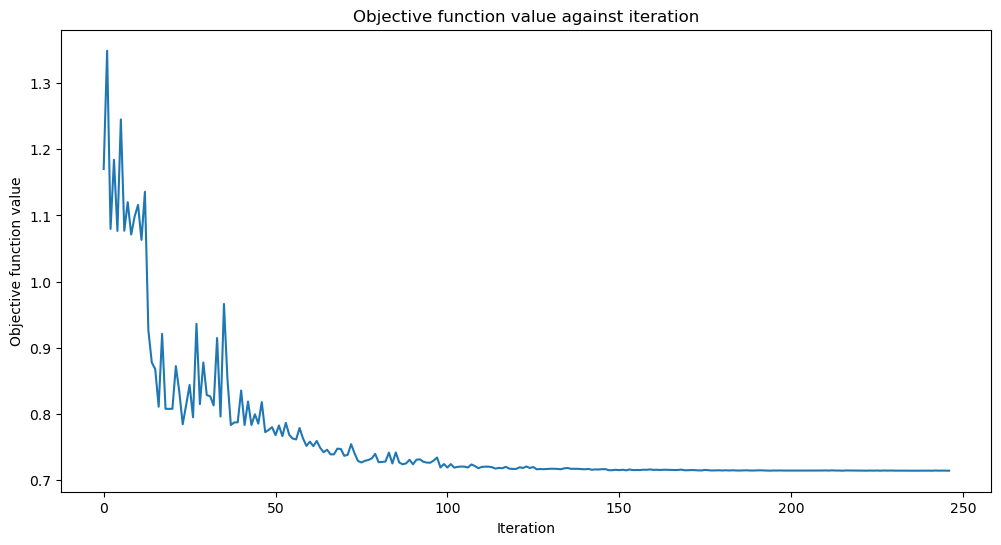

0.7805907172995781

In [26]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(np.array(train_input), np.array(train_labels))

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(train_input), np.array(train_labels))

In [27]:
train_score_q2_ra = vqc.score(train_input, train_labels)
test_score_q2_ra = vqc.score(test_input, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.78
Quantum VQC on the test dataset using RealAmplitudes:     0.80


# feature  = 2 , encoding = ZZFeatureMap , Ansatz = EfficientSU2

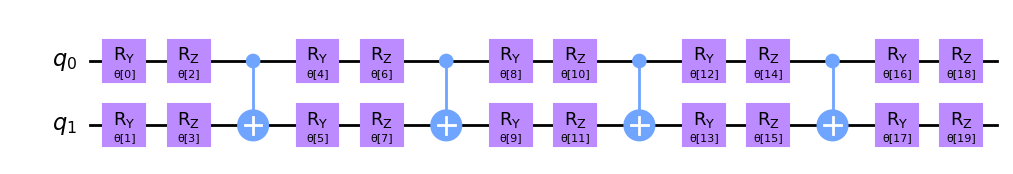

In [28]:
from  qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import EfficientSU2, RealAmplitudes
seed = 10598
feature_dim = 2
num_qubits =2 


ZZ_feature_map1 = ZZFeatureMap(feature_dimension=feature_dim, reps=4)


#Ansatz
variational_circ1 = EfficientSU2(num_qubits, reps=4)
variational_circ1.decompose().draw("mpl")

In [29]:
cobyla = COBYLA(maxiter=500, tol=0.001)

In [30]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [31]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [32]:
# initilizing backend
from qiskit import*
seed = 10598
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=2, feature_map=ZZ_feature_map1, ansatz=variational_circ1, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)

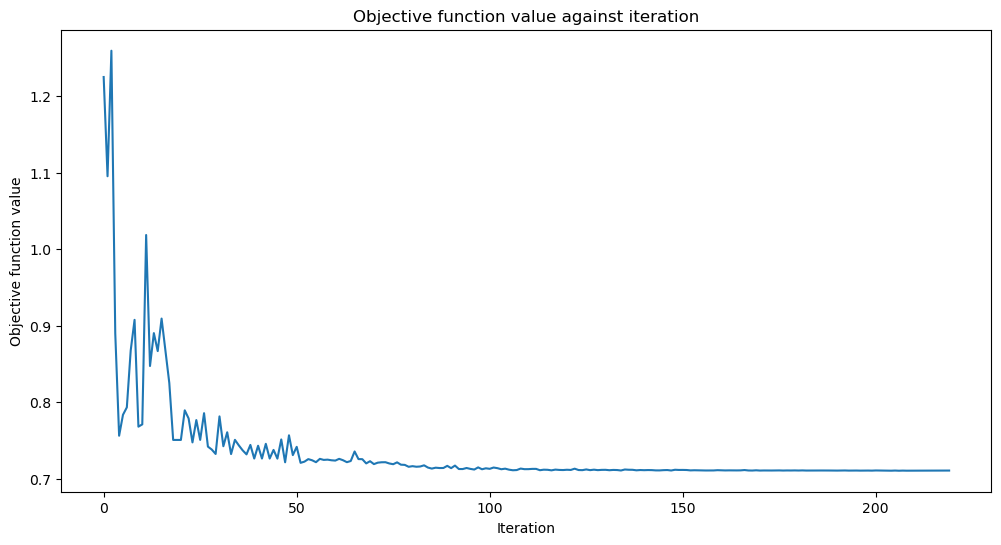

0.7651195499296765

In [33]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(np.array(train_input), np.array(train_labels))

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(train_input), np.array(train_labels))

In [34]:
train_score_q2_eff = vqc.score(train_input, train_labels)
test_score_q2_eff = vqc.score(test_input, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.77
Quantum VQC on the test dataset using EfficientSU2:     0.76


# feature = 2 , encoding = PaulFeatureMap , Ansatz = RealAmplitude

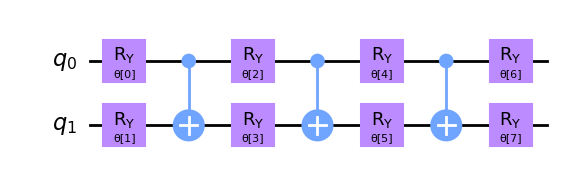

In [35]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2
feature_dim = 2
num_qubits = 2

#Encoding Unitaries
pauli_feature_map = PauliFeatureMap(feature_dimension=feature_dim,paulis = ['Z','X','ZY'], reps=4)



#Ansatz
variational_circ2 = RealAmplitudes(num_qubits, entanglement='full', reps=3)
variational_circ2.decompose().draw("mpl")

In [36]:
from  qiskit.algorithms.optimizers import COBYLA
from IPython.display import clear_output

cobyla = COBYLA(maxiter=500, tol=0.001)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


In [37]:
# initilizing backend
from qiskit import*
seed = 10598
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=2, feature_map=pauli_feature_map, ansatz=variational_circ2, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)


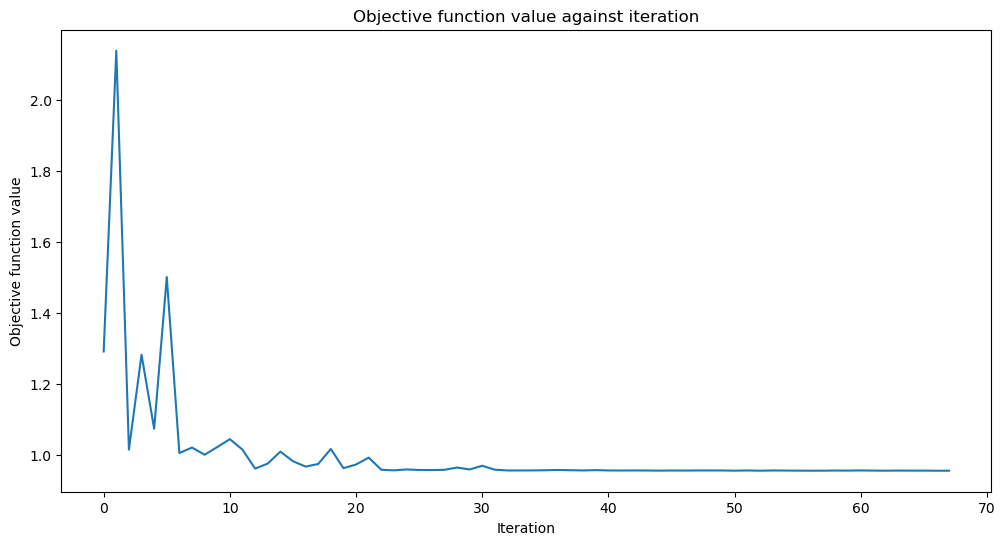

0.6343178621659634

In [38]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(np.array(train_input), np.array(train_labels))

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(train_input), np.array(train_labels))

In [39]:
train_score_q2_eff = vqc.score(train_input, train_labels)
test_score_q2_eff = vqc.score(test_input, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.63
Quantum VQC on the test dataset using EfficientSU2:     0.67


# feature = 2 , encoding = ZZFeatureMap , Ansatz = EfficientSU2{su2_gates=['rx', 'ry','y']}

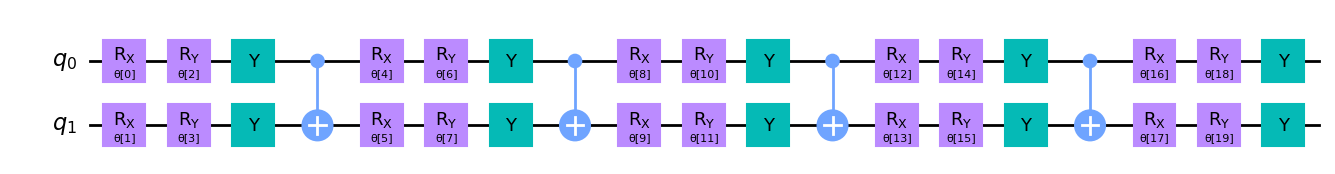

In [40]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2
feature_dim = 2
num_qubits = 2

#Encoding Unitaries
ZZ_feature_map2 = ZZFeatureMap(feature_dimension=feature_dim, reps=4)



#Ansatz
variational_circ3 = EfficientSU2(num_qubits,su2_gates=['rx', 'ry','y'], entanglement='circular', reps=4)
variational_circ3.decompose().draw("mpl")


In [41]:
from  qiskit.algorithms.optimizers import COBYLA
from IPython.display import clear_output

cobyla = COBYLA(maxiter=500, tol=0.001)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


In [42]:
# initilizing backend
from qiskit import*
seed = 10598
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=2, feature_map=ZZ_feature_map2, ansatz=variational_circ3, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)

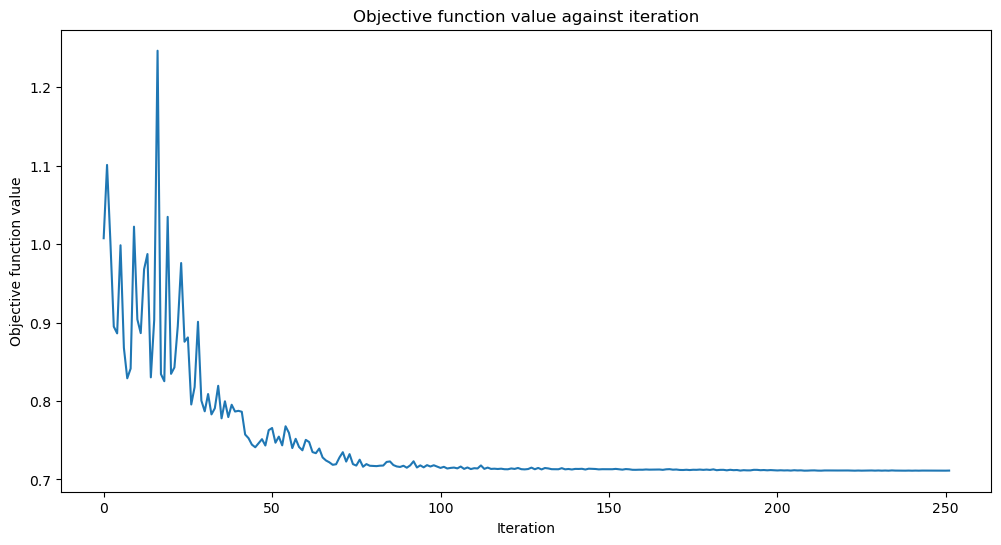

0.7609001406469761

In [43]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(np.array(train_input), np.array(train_labels))

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(train_input), np.array(train_labels))

In [44]:
train_score_q2_eff = vqc.score(train_input, train_labels)
test_score_q2_eff = vqc.score(test_input, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.76
Quantum VQC on the test dataset using EfficientSU2:     0.76


# feature = 2 , encoding = ZFeatureMap , Ansatz = EfficientSU2

In [45]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

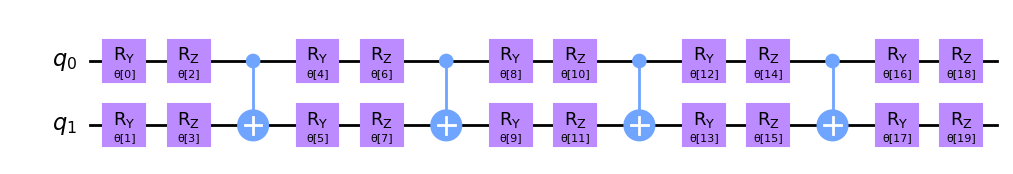

In [46]:
from  qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import EfficientSU2, RealAmplitudes
seed = 10598
feature_dim = 2

Z_feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=4)


#Ansatz
variational_circ4 = EfficientSU2(num_qubits, reps=4)
variational_circ4.decompose().draw("mpl")

In [47]:
from  qiskit.algorithms.optimizers import COBYLA
from IPython.display import clear_output

cobyla = COBYLA(maxiter=500, tol=0.001)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [48]:
# initilizing backend
from qiskit import*
seed = 10598
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {"method": "statevector"}
from qiskit_machine_learning.algorithms.classifiers import neural_network_classifier
from qiskit_machine_learning.algorithms import VQC
# creating a quantum instance
from qiskit.utils.quantum_instance import QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, backend_options=backend_options)

#initilizing VQC object
vqc = VQC(num_qubits=2, feature_map=Z_feature_map, ansatz=variational_circ4, loss='cross_entropy', optimizer=cobyla,quantum_instance=quantum_instance, callback = callback_graph)

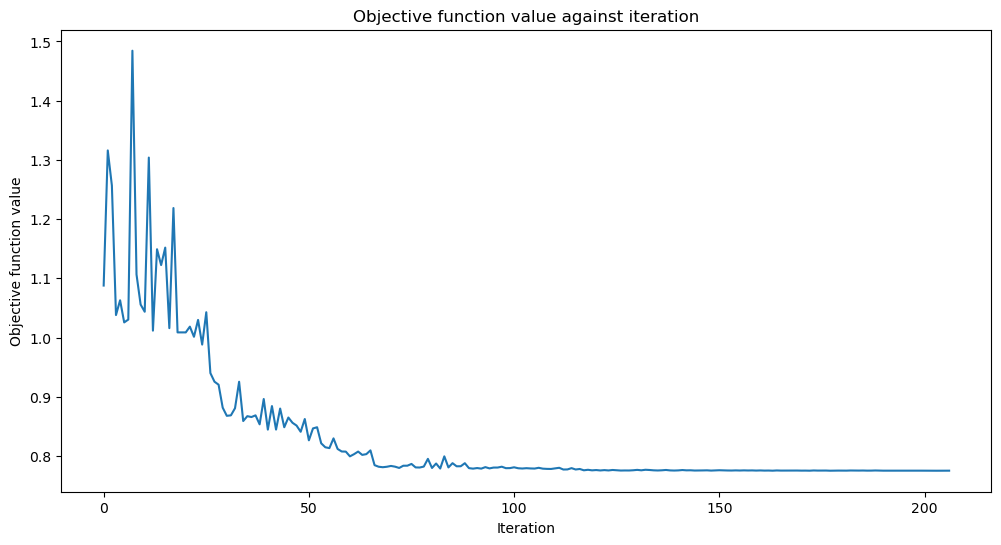

0.7510548523206751

In [49]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(np.array(train_input), np.array(train_labels))

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(np.array(train_input), np.array(train_labels))

In [50]:
# train_score_q2_eff = vqc.score(train_input, train_labels)
test_score_q2_eff = vqc.score(test_input, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.76
Quantum VQC on the test dataset using EfficientSU2:     0.79


In [56]:
train_input.shape

(711, 2)

In [57]:
test_input.shape

(178, 2)

In [58]:
train_labels.shape

(711,)

In [59]:
test_labels.shape

(178,)